In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


# Reading Data

In [2]:
df=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
column_to_drop =['cast','listed_in', 'description']
df.drop(columns=['cast','listed_in', 'description'], inplace =True)
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,NaN,"September 24, 2021",2021,TV-MA,1 Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season
4,s5,TV Show,Kota Factory,NaN,India,"September 24, 2021",2021,TV-MA,2 Seasons


In [5]:
df.rename(columns = { 'show_id' : 'id'}, inplace = True)

In [6]:
df.shape

(8807, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
dtypes: int64(1), object(8)
memory usage: 619.4+ KB


# Data Cleaning ,Exploratory and Analysis

In [8]:
df.head()

,id,type,title,director,country,date_added,release_year,rating,duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min
1,s2,TV Show,Blood & Water,NaN,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,NaN,"September 24, 2021",2021,TV-MA,1 Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season
4,s5,TV Show,Kota Factory,NaN,India,"September 24, 2021",2021,TV-MA,2 Seasons


In [9]:
df.describe

<bound method NDFrame.describe of          id     type                  title         director        country  \
0        s1    Movie   Dick Johnson Is Dead  Kirsten Johnson  United States   
1        s2  TV Show          Blood & Water              NaN   South Africa   
2        s3  TV Show              Ganglands  Julien Leclercq            NaN   
3        s4  TV Show  Jailbirds New Orleans              NaN            NaN   
4        s5  TV Show           Kota Factory              NaN          India   
...     ...      ...                    ...              ...            ...   
8802  s8803    Movie                 Zodiac    David Fincher  United States   
8803  s8804  TV Show            Zombie Dumb              NaN            NaN   
8804  s8805    Movie             Zombieland  Ruben Fleischer  United States   
8805  s8806    Movie                   Zoom     Peter Hewitt  United States   
8806  s8807    Movie                 Zubaan      Mozez Singh          India   

              dat

In [10]:
df.size

79263

# Identify missing values

In [11]:
df.isna().values.any()

True

In [12]:
df.isna().value_counts()

id     type   title  director  country  date_added  release_year  rating  duration
False  False  False  False     False    False       False         False   False       5747
                     True      False    False       False         False   False       2214
                     False     True     False       False         False   False        422
                     True      True     False       False         False   False        407
                               False    True        False         False   False          9
                     False     False    False       False         False   True           3
                     True      False    False       False         True    False          2
                     False     False    False       False         True    False          1
                     True      True     False       False         True    False          1
                                        True        False         False   False          1
Name: c

In [13]:
df.isna().sum()

id                 0
type               0
title              0
director        2634
country          831
date_added        10
release_year       0
rating             4
duration           3
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().sum()

id              0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

<Axes: >

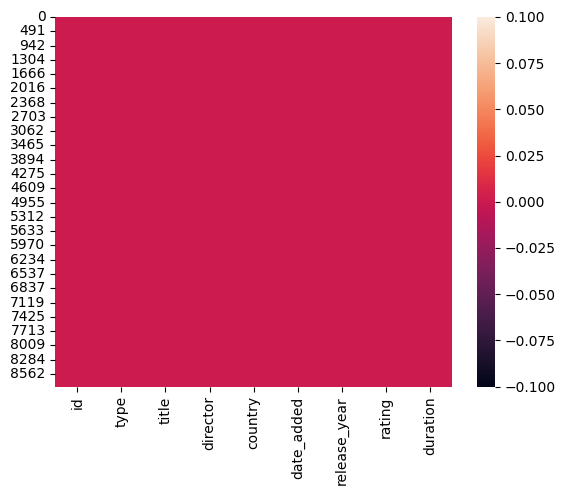

In [16]:
sns.heatmap(df.isnull())

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5747 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            5747 non-null   object
 1   type          5747 non-null   object
 2   title         5747 non-null   object
 3   director      5747 non-null   object
 4   country       5747 non-null   object
 5   date_added    5747 non-null   object
 6   release_year  5747 non-null   int64 
 7   rating        5747 non-null   object
 8   duration      5747 non-null   object
dtypes: int64(1), object(8)
memory usage: 449.0+ KB


In [18]:
df.isnull().sum()

id              0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [19]:
df.describe()

,release_year
count,5747.000000
mean,2012.919610
std,9.775561
min,1942.000000
25%,2012.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


In [20]:
df.corr

<bound method DataFrame.corr of          id     type                          title             director  \
0        s1    Movie           Dick Johnson Is Dead      Kirsten Johnson   
7        s8    Movie                        Sankofa         Haile Gerima   
8        s9  TV Show  The Great British Baking Show      Andy Devonshire   
9       s10    Movie                   The Starling       Theodore Melfi   
12      s13    Movie                   Je Suis Karl  Christian Schwochow   
...     ...      ...                            ...                  ...   
8801  s8802    Movie                        Zinzana      Majid Al Ansari   
8802  s8803    Movie                         Zodiac        David Fincher   
8804  s8805    Movie                     Zombieland      Ruben Fleischer   
8805  s8806    Movie                           Zoom         Peter Hewitt   
8806  s8807    Movie                         Zubaan          Mozez Singh   

                                                country

# Data Visualisation

In [21]:
df.head()

,id,type,title,director,country,date_added,release_year,rating,duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons
9,s10,Movie,The Starling,Theodore Melfi,United States,"September 24, 2021",2021,PG-13,104 min
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min


In [22]:
data = pd.DataFrame(df)

AttributeError: module 'matplotlib' has no attribute 'title'

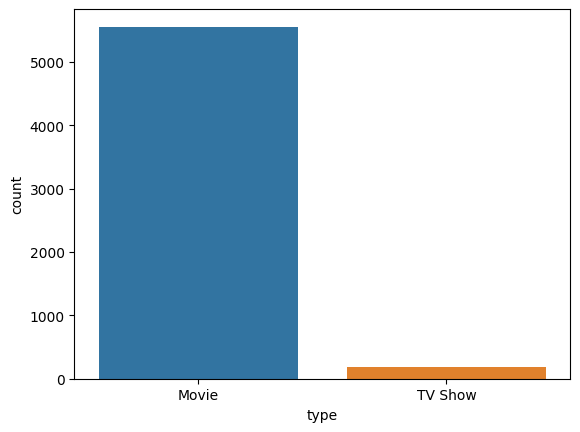

In [23]:
sns.countplot(x='type', data=df)
plt.title('Number of Films by Type')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'title'

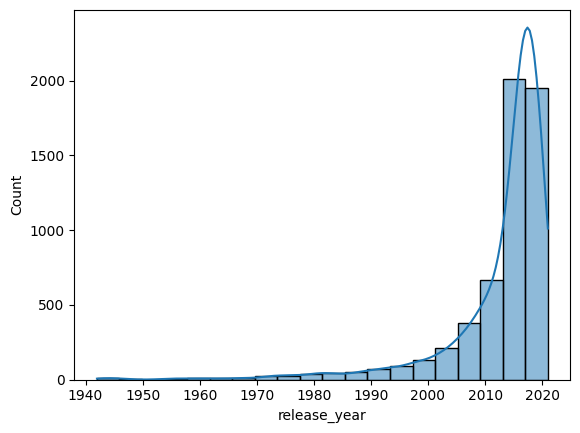

In [24]:
sns.histplot(x='release_year', data=df, bins=20, kde=True)
plt.title('Distribution of Film Release Years')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'title'

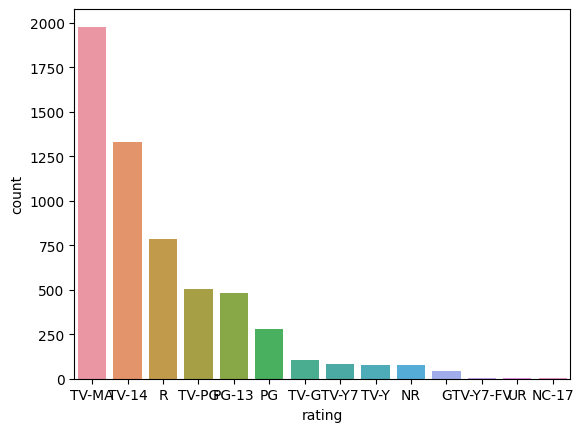

In [25]:
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Number of Films by Rating')
plt.show()